# Train,Test Data

In [1]:

import sys
sys.path.append('..')

import assignment3
# import importlib
# importlib.reload(assignment3.evaluator)

from assignment3.iteration import EMProcess
from assignment3.evaluator import Evaluator
from assignment3.utils import *
from assignment3.build_matrices import *
from assignment3.em import *
import matplotlib.pyplot as plt

In [2]:
train_files = ['../data/hw3-train.fasta']
test_files = ['../data/hw3-test.fasta']
train_sequences = get_seqs_from_files(train_files)
test_sequences = get_seqs_from_files(test_files)
k = 10
background = [0.25]*4
pseudo_counts = get_pseudo_count_vector()
print('Initialization pseudo_counts = ', pseudo_counts)

Initialization pseudo_counts =  [0.0625, 0.0625, 0.0625, 0.0625]


# EM step

In [3]:
def get_entropies(processes):
    entropies = np.array([p.wmm.entropy for p in processes])
    return entropies

In [4]:
seeds = get_seed_kmers(train_sequences[0] ,k)

processes = []
all_entropies = {}
for seed in seeds:
    process = EMProcess(train_sequences, k , background)
    processes.append(process)
    process.initialize(seed,pseudo_counts)


In [5]:

for i in range(3):
    for process in processes:
        process.iterate()
    all_entropies[i+1] = get_entropies(processes)


..\assignment3\em.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  E_zij = np.array(E_zij)


### ABC

For each of the S seed WMMs defined in "Initialization," do three E-step/M-step pairs. Among the resulting S WMMs, select three WMMs: the ones attaining the highest entropy (relative to background), the median entropy, and the lowest entropy. Call these WMMs A, B and C, respectively.



In [6]:
entropies = np.array([p.wmm.entropy for p in processes])


highest, median, lowest = np.argmax(entropies), np.argsort(entropies)[len(entropies)//2], np.argmin(entropies)
print('highest, median, lowest = ',highest, median, lowest)
print(entropies)

highest, median, lowest =  10 9 0
[ 3.55197998  9.71542618  6.33491258  9.03895578  9.84228116  4.66300092
  4.05578662  4.47680192  3.94456215  7.35605543 12.18418438  4.37107608
  8.32279224  6.48951569  7.56468427 11.86343593 10.87528294  5.98434791
 12.12134859  3.84995166  8.29025588]


In [7]:
import copy
A, B, C = processes[highest].wmm, processes[median].wmm, processes[lowest].wmm
A,B,C = copy.deepcopy(A),copy.deepcopy(B),copy.deepcopy(C)


### Additional 7 rounds 
Run an additional 7 E-step/M-step pairs on all S of the third-round WMMs (a total of 10 E-M rounds on each). 

In [8]:
for i in range(7):
    for process in processes:
        process.iterate()
    all_entropies[i+1+3] = get_entropies(processes)

### D
Select as your final "motif" the best (highest entropy) of the S candidates after round 10; call this WMM D.

In [9]:
entropies_7 = np.array([p.wmm.entropy for p in processes])
print(entropies_7)
D = processes[np.argmax(entropies_7)].wmm


[12.39471195 12.56337179 12.3654152  11.16292572 12.56249425  7.7298578
 11.94564823  5.91903698 12.49043582 12.00826135 12.44804071 12.44081621
 11.16409987 10.50508686 12.55477369 12.36807059 12.5638478  12.00614158
 12.4474529   6.57201618 12.44133114]


### Entropy table 
As a simple descriptive summary of this process, print in a tidy-ish S row by 11 column table the entropies of each seed WMM and its 10 successive E-M-refined iterates.

In [10]:
import pandas as pd
table = pd.DataFrame(all_entropies)
table['seed'] = seeds 
table = table[['seed'] + table.columns.tolist()[:-1]]
table.style.set_caption("Entropy : rows = seed numbers, columns = EM iterations")
print("Entropy : rows = seed numbers, columns = EM iterations")
table

Entropy : rows = seed numbers, columns = EM iterations


,seed,1,2,3,4,5,6,7,8,9,10
0,GGAAATGAGG,4.101437,3.468243,3.551980,3.849892,4.383546,5.688415,8.785526,11.569722,12.264413,12.394712
1,TGAGGCTGCG,5.604047,6.771253,9.715426,11.852455,12.431397,12.526650,12.550561,12.558947,12.562129,12.563372
2,CTGCGGGATC,4.641795,4.778124,6.334913,8.835332,11.115841,12.087170,12.310047,12.355397,12.363863,12.365415
3,GGATCAGCTC,5.890140,7.380620,9.038956,10.124201,10.763748,11.050907,11.126215,11.148089,11.157707,11.162926
4,AGCTCCTGAA,5.332176,6.757424,9.842281,11.713263,12.357636,12.498027,12.538904,12.553988,12.560030,12.562494
5,CTGAAAGGAT,4.295636,4.138803,4.663001,5.233681,5.721469,6.103128,6.395686,6.677838,7.080728,7.729858
6,AGGATTGCCA,4.562124,3.952344,4.055787,4.367531,4.764176,5.316484,6.337252,8.039143,10.472762,11.945648
7,TGCCAGTGAC,4.992468,4.432280,4.476802,4.652510,4.852564,5.050463,5.247388,5.454646,5.679295,5.919037
8,GTGACCTCAT,4.238754,3.662672,3.944562,4.513943,5.289677,6.588113,8.761957,10.906106,12.213789,12.490436
9,CTCATGCAGC,6.379387,6.706870,7.356055,7.992894,8.911042,10.537516,11.638820,11.928704,11.990232,12.008261


### Also print the frequency matrices for WMMs A, B, C, and D.

In [11]:
fm = calculateProbabilities(A, background)
print(f'\n\nFrequency matrix for A')
fm



Frequency matrix for A


,1,2,3,4,5,6,7,8,9,10
A,0.118584,0.002558,0.952511,0.002936,0.004448,0.006176,0.002803,0.002989,0.002950,0.221105
C,0.183453,0.991722,0.005976,0.245307,0.990142,0.005422,0.006039,0.381009,0.437490,0.312607
G,0.566982,0.002825,0.002541,0.748941,0.002846,0.002496,0.988428,0.020058,0.139423,0.225005
T,0.130981,0.002894,0.038972,0.002816,0.002564,0.985906,0.002729,0.595943,0.420137,0.241283


In [12]:
fm = calculateProbabilities(B, background)
print(f'\n\nFrequency matrix for B')
fm



Frequency matrix for B


,1,2,3,4,5,6,7,8,9,10
A,0.189730,0.239062,0.069338,0.298021,0.408076,0.021128,0.028741,0.614369,0.010765,0.033626
C,0.558870,0.194539,0.507797,0.500854,0.039201,0.202788,0.912328,0.017890,0.045067,0.840690
G,0.100271,0.085581,0.319526,0.095338,0.211507,0.724856,0.018530,0.005304,0.922845,0.062231
T,0.151129,0.480817,0.103339,0.105786,0.341216,0.051228,0.040401,0.362437,0.021322,0.063453


In [13]:
fm = calculateProbabilities(C, background)
print(f'\n\nFrequency matrix for C')
fm



Frequency matrix for C


,1,2,3,4,5,6,7,8,9,10
A,0.150222,0.100832,0.351546,0.245391,0.367100,0.119166,0.042231,0.458523,0.084843,0.137267
C,0.031810,0.253620,0.266641,0.352051,0.377278,0.064859,0.332720,0.104604,0.143019,0.271611
G,0.655056,0.587441,0.291439,0.304227,0.191815,0.292021,0.606450,0.117929,0.632961,0.431812
T,0.162912,0.058107,0.090373,0.098331,0.063806,0.523955,0.018599,0.318945,0.139177,0.159309


In [14]:
fm = calculateProbabilities(D, background)
print(f'\n\nFrequency matrix for D')
fm



Frequency matrix for D


,1,2,3,4,5,6,7,8,9,10
A,0.255011,0.129598,0.002572,0.990627,0.002561,0.002766,0.003498,0.002512,0.002565,0.002544
C,0.106450,0.196177,0.992282,0.002637,0.258775,0.992099,0.002480,0.002622,0.406971,0.402154
G,0.272942,0.529703,0.002597,0.002485,0.736088,0.002611,0.002485,0.992379,0.014197,0.125378
T,0.365597,0.144522,0.002549,0.004251,0.002576,0.002524,0.991537,0.002487,0.576266,0.469924


# Evaluation

### Plot Scores
To use this as a "gold standard" against which to evaluate a motif, you scan each sequence with your motif WMM, scoring each of the 113-k+1 potential start positions.

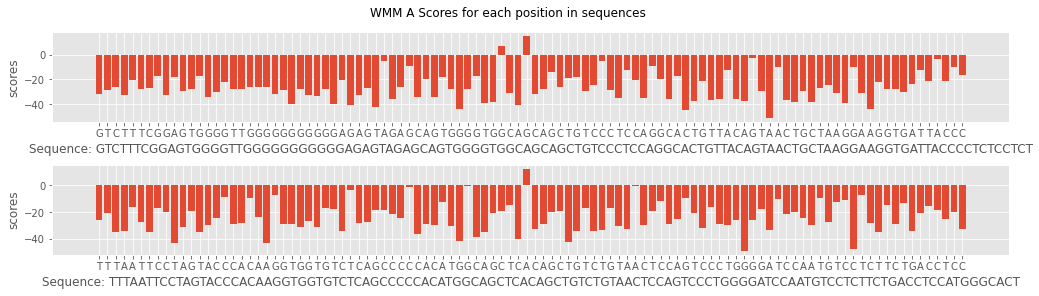

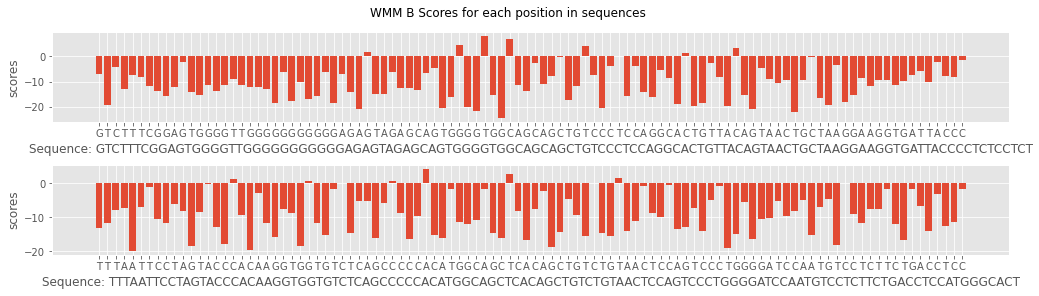

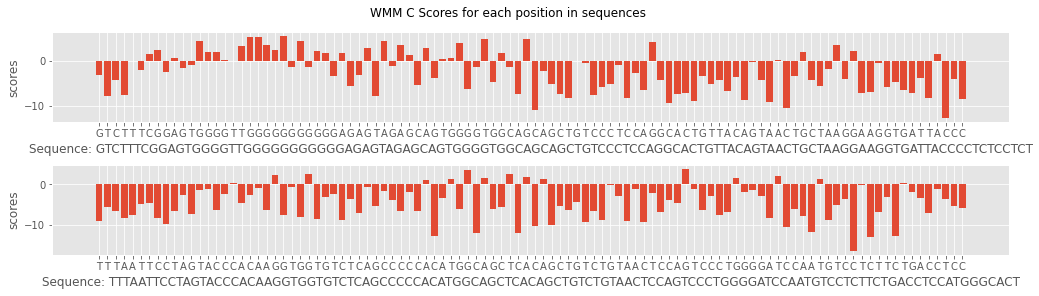

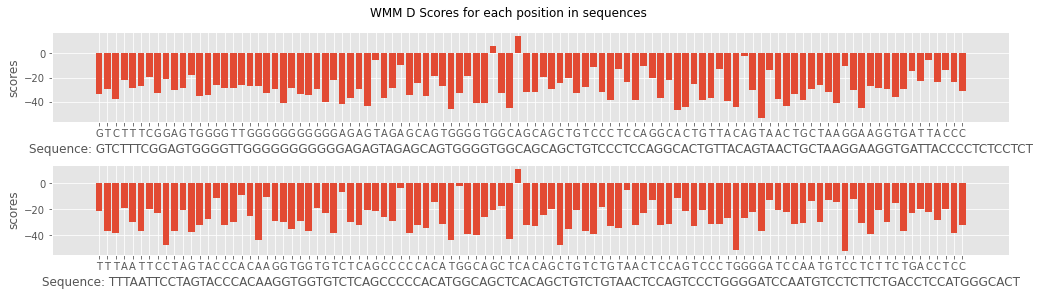

In [15]:
evals = []
for name, wmm in zip('ABCD', [A,B,C,D]):
    eval = Evaluator(wmm, test_sequences)
    eval.name = name
    evals.append(eval)
    eval.plot_results()

    # combine scores and create y_true. Calculate ROC

### Motif predicted position histogram
1. Let c(j) be the count of the number of test sequences whose highest WMM score (leftmost highest, if ties) occurred at position j . Plot this histogram. 
 
2. Additionally, calculate and print m = arg max { c(j) | 1 ≤ j ≤ 113-k+1 }. 
    1. I.e., m is the most common location of the best motif hit in each sequence; 
    1. equivalently, it is the peak in the c(j) histogram.
    1. If things are working correctly, most of the best motif hits should overlap the gold-standard location by at least k/2 positions, i.e., (51-⌊k/2⌋) ≤ m ≤ (63-⌈k/2⌉). 

Most common location of the best motif hit in each sequence = 52


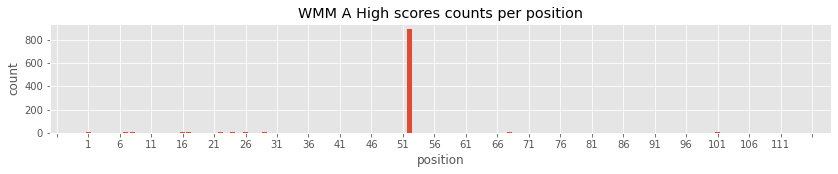

Most common location of the best motif hit in each sequence = 50


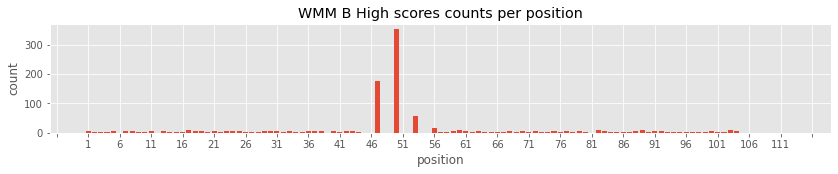

Most common location of the best motif hit in each sequence = 52


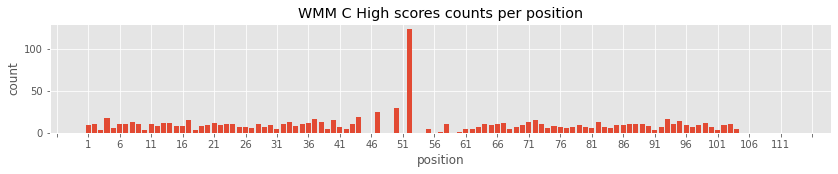

Most common location of the best motif hit in each sequence = 51


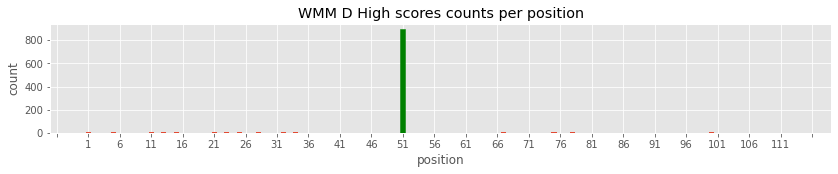

In [24]:

motif_pos = 51
# print('gold_start, gold_end = ',gold_start, gold_end)
# print('Gold sequence = ',train_sequences[0][50:51+k])
for  eval in evals:
    eval.set_gold_positions(start = 51, end = 51)
    eval.plot_highscore_histogram()

# ROC

Generate an ROC plot for your motif, and calculate AUC. 

To do this for a test set containing n sequences, you will have n * (113 - k + 1) WMM scores, n of them labeled True, and the rest False. 

### ROC plot

In [25]:
for eval in evals:
    y_score, y_true = eval.get_y()
    y_true = y_true.squeeze() == 1
    y_score = y_score.squeeze() >-1
    P = y_true.sum()
    N = len(y_true)-P
    TP = np.logical_and(y_true, y_score)
    FP = np.logical_and(np.logical_not(y_true), y_score)
    print(eval.name, TP.sum()/ P, FP.sum()/N)
#     print(eval.name, (y_true== y_score).sum()/len(y_true))

A 0.0 0.03127184466019418
B 0.0 0.11727184466019418
C 0.0 0.2571747572815534
D 1.0 0.013689320388349515


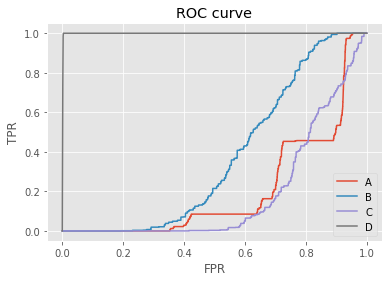

In [26]:
from assignment3.roc import ROC
import matplotlib.pyplot as plt
rocs = []
# plt.set_color_cycle(['red', 'black', 'yellow'])
for eval in evals:
    y_score, y_true = eval.get_y()
    r = ROC(y_true, y_score)
    rocs.append(r)
    r.plot_roc()
plt.legend([e.name for e in evals])

### AUC

In [27]:
for eval, r in zip(evals, rocs):
    print(f'AUC for WMM {eval.name} = {r.calculateAUC():.3f}')

AUC for WMM A = 0.206
AUC for WMM B = 0.374
AUC for WMM C = 0.187
AUC for WMM D = 0.999


### Largest threshold
for WMM C, what is the largest τ recovering all True Positives, how many False Positives, True Negatives and False Negatives are found with the same τ and what are the corresponding TPR and FPR values?

C = lowest Entropy

Reload a module:

import importlib, then do importlib.reload(nameOfModule)
https://stackoverflow.com/questions/1254370/reimport-a-module-in-python-while-interactive

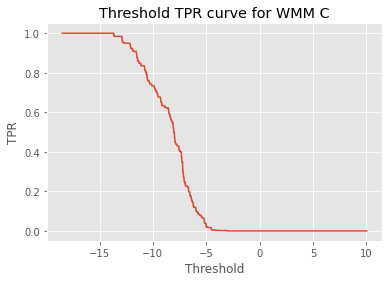

In [28]:
r = rocs[2]
plt.plot(r.thresholds,r.tprs)
plt.xlabel('Threshold')
plt.ylabel('TPR')
plt.title('Threshold TPR curve for WMM C')
plt.show()

In [29]:
t = r.largest_thres_TPR1()
print(f'WMM C: Largest Threshold with TPR 1 for = {t:.3f}')

WMM C: Largest Threshold with TPR 1 for = -13.670


In [30]:
tpr, fpr, tp, fp, tn, fn = r.get_TPR_FPR_TP_FP_TN_FN(t)
print('WMM C : At threshold f {:.3f} , TPR = {}, FPR = {:.3f}, tp = {}, fp = {}, tn = {}, fn = {}'.format(t, tpr, fpr, tp, fp, tn, fn))

WMM C : At threshold f -13.670 , TPR = 1.0, FPR = 0.991, tp = 1000, fp = 102095, tn = 905, fn = 0
